 ## EDA Titanic Data Set

In [1]:
# Importing necessary libraries and loading data.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline
sns.set(color_codes=True)

df_train = pd.read_csv("Data/train.csv")
df_train_org = pd.read_csv("Data/train.csv")
df_test = pd.read_csv("Data/test.csv")
df_test_org = pd.read_csv("Data/test.csv")
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### Checking and modifying the dataframe

In [2]:
# Checking the data types.
print(f"Train Data Types: \n{df_train.dtypes}\n")
print(f"Test Data Types: \n{df_train.dtypes}")

Train Data Types: 
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Test Data Types: 
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [3]:
# Checking the shape (dimensions).
print(f"Train Data Dimension: {df_train.shape}")
print(f"Test Data Dimension: {df_test.shape}\n")
# Checking for duplicate entries (there are none).
duplicates_train = df_train[df_train.duplicated()]
print(f" Train Data Dumplicates: {duplicates_train.shape}")

duplicates_test = df_test[df_test.duplicated()]
print(f" Train Data Dumplicates: {duplicates_test.shape}")

Train Data Dimension: (891, 12)
Test Data Dimension: (418, 11)

 Train Data Dumplicates: (0, 12)
 Train Data Dumplicates: (0, 11)


In [4]:
# Checking for null (NaN) values in training data.
print(df_train.isnull().sum())  #isnull() returns dataframe with True if null else False
# Replace NaN in the age column with the mean (or median).
df_train["Age"] = df_train["Age"].fillna(df_train["Age"].mean())
# Validation.
print("\nValidation:\n")
print(df_train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Validation:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
# Checking for null (NaN) values in test data.
print(df_test.isnull().sum())  #isnull() returns dataframe with True if null else False
# Replace NaN in the age/fare column with the mean (or median).
df_test["Age"] = df_test["Age"].fillna(df_test["Age"].mean())
df_test["Fare"] = df_test["Fare"].fillna(df_test["Fare"].mean())
# Validation.
print("\nValidation:\n")
print(df_test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Validation:

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [6]:
# Replacing sex with numerical values (0 if female else 1) in train and test set.
df_train["Sex"] = df_train["Sex"].replace({"female" : 0, "male" : 1})
df_test["Sex"] = df_test["Sex"].replace({"female" : 0, "male" : 1})

In [7]:
# Dropping cabin


In [8]:
# Embarked number


In [9]:
# Checking train data before EDA
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S

In [10]:
# Checking train data before EDA
df_test.head()

PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    1   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    0   
2          894       2                     Myles, Mr. Thomas Francis    1   
3          895       3                              Wirz, Mr. Albert    1   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

### Exploring distributions of the variables

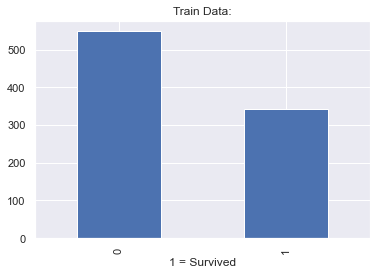

In [11]:
# Histogram of survival.
df_train["Survived"].value_counts().plot(kind="bar")
plt.xlabel("1 = Survived")
df_train["Survived"].value_counts(normalize="True")
plt.title("Train Data:")
plt.show()

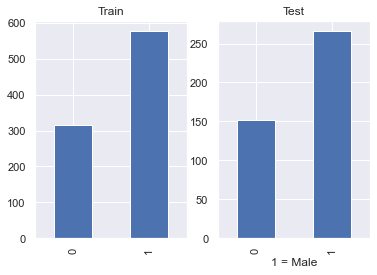

Train      Test
1  0.647587  0.636364
0  0.352413  0.363636

In [12]:
# Barplot of sex.
# Set overall settings for plot
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
df_train["Sex"].value_counts().plot(kind="bar", ax=axes[0], title="Train")
df_test["Sex"].value_counts().plot(kind="bar", ax=axes[1], title="Test")
plt.xlabel("1 = Male")
plt.show()

x = df_train["Sex"].value_counts(normalize=True).rename("Train")
y = df_test["Sex"].value_counts(normalize=True).rename("Test")
summary = pd.concat([x, y], axis=1)
summary

Train Data:
3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64


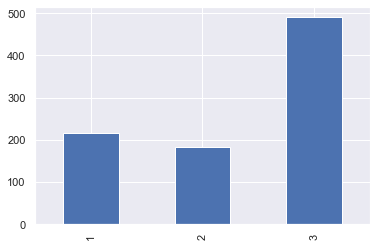


 Test Data:
3    0.521531
1    0.255981
2    0.222488
Name: Pclass, dtype: float64


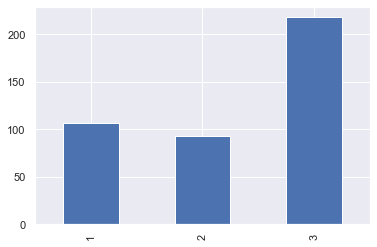

In [13]:
# Barplot of Pclasses.
print("Train Data:")
df_train["Pclass"].value_counts().plot(kind="bar")
print(df_train["Pclass"].value_counts(normalize="True"))
plt.show()

print("\n Test Data:")
df_test["Pclass"].value_counts().plot(kind="bar")
print(df_test["Pclass"].value_counts(normalize="True"))
plt.show()

Train Data:


<AxesSubplot:>

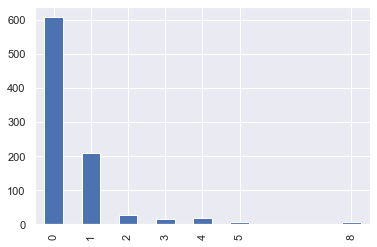

In [14]:
# Barplot of Number of Siblings:
print("Train Data:")
df_train["SibSp"].value_counts().plot(kind="bar")

Train Data:


<AxesSubplot:>

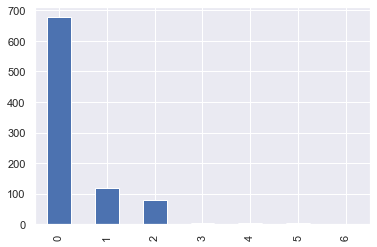

In [15]:
# Barplot of Number of Parches:
print("Train Data:")
df_train["Parch"].value_counts().plot(kind="bar")

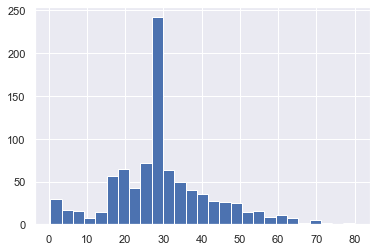

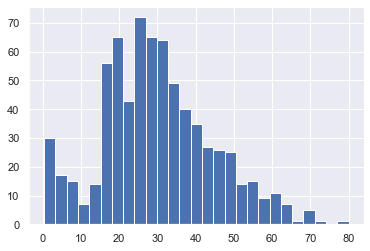

Mean: 29.7
Median: 28.0


In [16]:
# Histogram of the age distribution in Training Data:
ages = df_train["Age"].values.tolist()
n = math.ceil((max(ages) - min(ages))/3)
ax = plt.hist(ages, bins = n)
plt.show()
ages = df_train_org["Age"].values.tolist()
n = math.ceil((max(ages) - min(ages))/3)
ax = plt.hist(ages, bins = n)
plt.show()
ages_na = df_train_org["Age"].dropna().tolist()
print(f"Mean: {round(np.mean(ages_na),2)}")
print(f"Median: {np.median(ages_na)}")

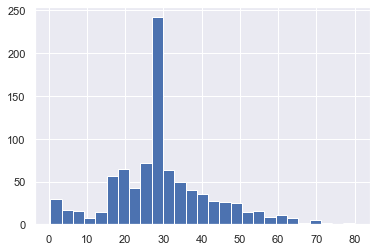

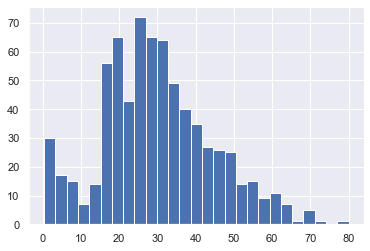

Mean: 29.7
Median: 28.0


In [17]:
# Histogram of the age distribution in Test Data:
ages = df_train["Age"].values.tolist()
n = math.ceil((max(ages) - min(ages))/3)
ax = plt.hist(ages, bins = n)
plt.show()
ages = df_train_org["Age"].values.tolist()
n = math.ceil((max(ages) - min(ages))/3)
ax = plt.hist(ages, bins = n)
plt.show()
ages_na = df_train_org["Age"].dropna().tolist()
print(f"Mean: {round(np.mean(ages_na),2)}")
print(f"Median: {np.median(ages_na)}")

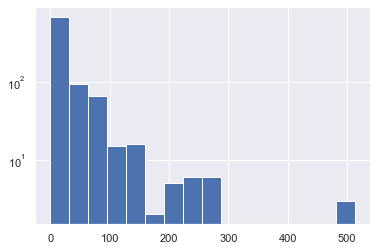

In [18]:
# Histogram of the fares.
fares = df_train["Fare"].values.tolist()
n = math.ceil((max(ages) - min(ages))/5)
ax = plt.hist(fares, bins = n, log=True)

### Exploring relationships between variables

In [19]:
# Select all persons that did not survive.
df_train_dead = df_train[df_train["Survived"] == 0]
df_train_dead.head()

PassengerId  Survived  Pclass                            Name  Sex  \
0            1         0       3         Braund, Mr. Owen Harris    1   
4            5         0       3        Allen, Mr. William Henry    1   
5            6         0       3                Moran, Mr. James    1   
6            7         0       1         McCarthy, Mr. Timothy J    1   
7            8         0       3  Palsson, Master. Gosta Leonard    1   

         Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
0  22.000000      1      0  A/5 21171   7.2500   NaN        S  
4  35.000000      0      0     373450   8.0500   NaN        S  
5  29.699118      0      0     330877   8.4583   NaN        Q  
6  54.000000      0      0      17463  51.8625   E46        S  
7   2.000000      3      1     349909  21.0750   NaN        S

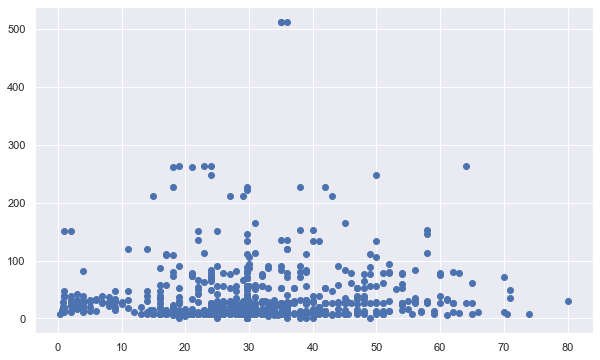

Person Correlation: 0.09156609328505758


In [20]:
# Using scatterplot to look at the relationships of continous variables
# Here Age and Fare
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_train["Age"], df_train["Fare"])
plt.show()
print(f"Person Correlation: {np.corrcoef(np.array(df_train['Age']), np.array(df_train['Fare']))[0][1]}")

In [21]:
# Define Visualization Functions:
from tabulate import tabulate
def cat_vis(df, df_dead, var): 
    fig, axes = plt.subplots(nrows=1, ncols=2)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    df[var].value_counts().plot(kind="bar", ax=axes[0], title="All")
    df_dead[var].value_counts().plot(kind="bar", ax=axes[1], title="Dead")
    y_max = df[var].value_counts().max()
    y_max *= 1.1                            
    axes[0].set_ylim([0, y_max])
    axes[1].set_ylim([0, y_max])
    plt.show()

def cat_dist(df, df_dead, var):
    x = df[var].value_counts(normalize=True).rename("All")
    y = df_dead[var].value_counts(normalize=True).rename("Dead")
    summary = pd.concat([x, y], axis=1)*100
    summary["Dead/All"] = summary.apply(lambda row: row[1]/row[0], axis=1)
    summary = round(summary, 2)
    print(summary)

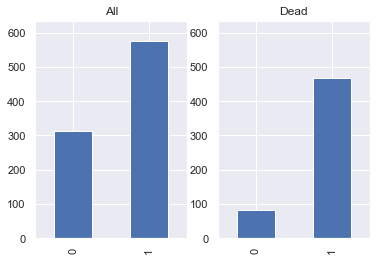

     All   Dead  Dead/All
1  64.76  85.25      1.32
0  35.24  14.75      0.42


In [22]:
# Sex of the deceased
cat_vis(df_train, df_train_dead, "Sex")
cat_dist(df_train, df_train_dead, "Sex")

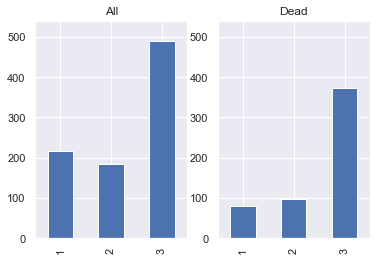

     All   Dead  Dead/All
1  24.24  14.57      0.60
2  20.65  17.67      0.86
3  55.11  67.76      1.23


In [23]:
# Check classes of deceased.
cat_vis(df_train, df_train_dead, "Pclass")
cat_dist(df_train, df_train_dead, "Pclass")

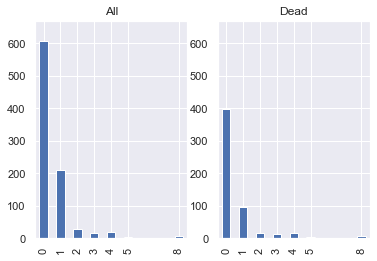

     All   Dead  Dead/All
0  68.24  72.50      1.06
1  23.46  17.67      0.75
2   3.14   2.73      0.87
4   2.02   2.73      1.35
3   1.80   2.19      1.22
8   0.79   1.28      1.62
5   0.56   0.91      1.62


In [24]:
# Check Number of siblings of deceased.
cat_vis(df_train, df_train_dead, "SibSp")
cat_dist(df_train, df_train_dead, "SibSp")

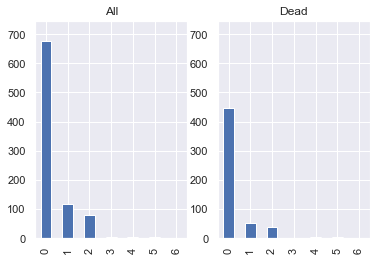

     All   Dead  Dead/All
0  76.09  81.06      1.07
1  13.24   9.65      0.73
2   8.98   7.29      0.81
3   0.56   0.36      0.65
4   0.45   0.73      1.62
5   0.56   0.73      1.30
6   0.11   0.18      1.62


In [25]:
# Check Number of Parches of deceased.
cat_vis(df_train, df_train_dead, "Parch")
cat_dist(df_train, df_train_dead, "Parch")

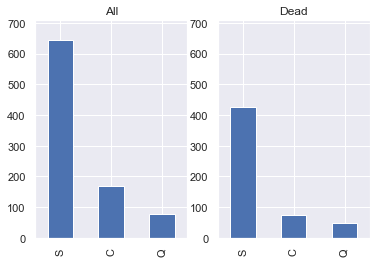

     All   Dead  Dead/All
S  72.44  77.78      1.07
C  18.90  13.66      0.72
Q   8.66   8.56      0.99


In [26]:
# Check Embarked
cat_vis(df_train, df_train_dead, "Embarked")
cat_dist(df_train, df_train_dead, "Embarked")

In [27]:
# Compare Age distribution between survival
def boxplots(df, df_dead, var):
    fig, axes = plt.subplots(nrows=1, ncols=2)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    df[[var]].boxplot(ax=axes[0])
    df_dead[[var]].boxplot(ax=axes[1])
    y_max = df_train[[var]].max()
    y_max *= 1.1
    axes[0].set_title("All")
    axes[1].set_title("Dead")
    axes[0].set_ylim([0, int(y_max)])
    axes[1].set_ylim([0, int(y_max)])
    plt.title("")
    plt.show()
    
def histograms(df, df_dead, var):
    fig, axes = plt.subplots(nrows=1, ncols=2)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    df[var].hist(ax=axes[0], bins=20)
    df_dead[var].hist(ax=axes[1], bins=20)
    axes[0].set_title("All")
    axes[1].set_title("Dead")
    limit = max(axes[0].get_ylim(), axes[1].get_ylim())[1]
    limit *= 1.1
    axes[0].set_ylim([0, int(limit)])
    axes[1].set_ylim([0, int(limit)])
    plt.show()
    

def distributions(df, df_dead, var):
    summary = pd.DataFrame({
        "Mean": [np.mean(df[var]), np.mean(df_dead[var])],
        "Median": [np.median(df[var]), np.median(df_dead[var])],
    }, index=["All", "Dead"])
    print(summary)

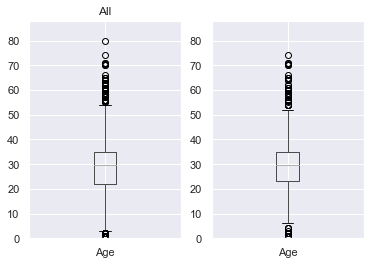

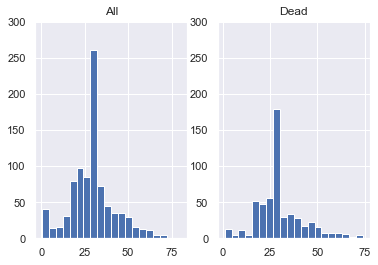

           Mean     Median
All   29.699118  29.699118
Dead  30.415100  29.699118


In [28]:
# Age Comparison with NaN filled with mean
boxplots(df_train, df_train_dead, "Age")
histograms(df_train, df_train_dead, "Age")
distributions(df_train, df_train_dead, "Age")

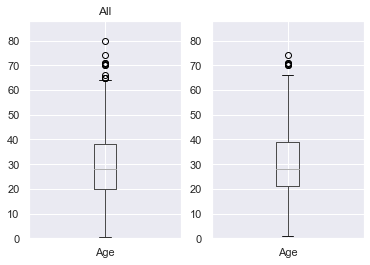

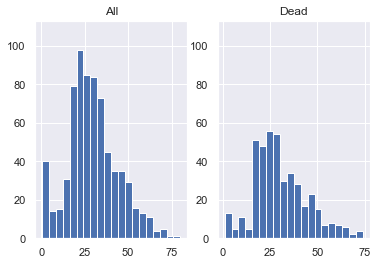

           Mean  Median
All   29.699118    28.0
Dead  30.626179    28.0


In [29]:
# Age Comparison with NaNs omitted
df_train_org = df_train_org.dropna(subset=["Age"])
dead = df_train_org[df_train_org["Survived"] == 0]
boxplots(df_train_org, dead, "Age")
histograms(df_train_org, dead, "Age")
distributions(df_train_org, dead, "Age")

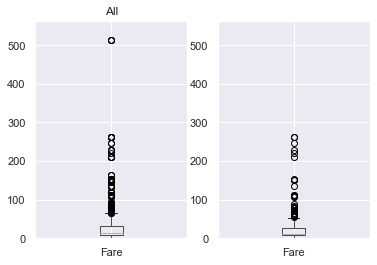

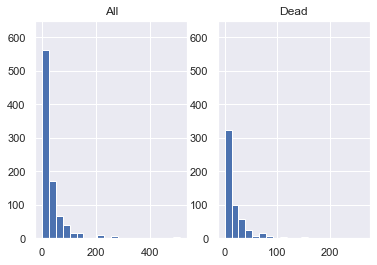

           Mean   Median
All   32.204208  14.4542
Dead  22.117887  10.5000


In [30]:
# Fares Comparison
boxplots(df_train, df_train_dead, "Fare")
histograms(df_train, df_train_dead, "Fare")
distributions(df_train, df_train_dead, "Fare")

<ipython-input-31-5b671a6556f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_dead["NameLength"] = df_train_dead.apply(lambda row: len(row.Name), axis = 1)


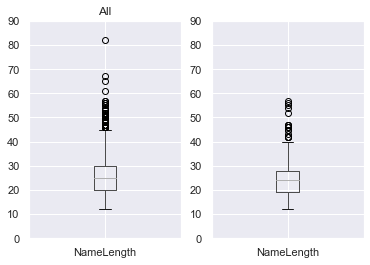

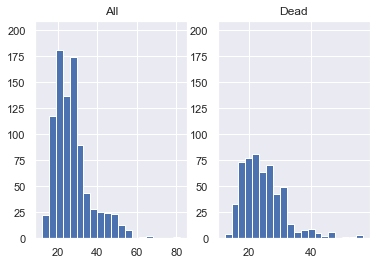

           Mean  Median
All   26.965208    25.0
Dead  24.531876    24.0


In [31]:
# Add string length to dataframe
df_train["NameLength"] = df_train.apply(lambda row: len(row.Name), axis = 1)
df_train_dead["NameLength"] = df_train_dead.apply(lambda row: len(row.Name), axis = 1)

boxplots(df_train, df_train_dead, "NameLength")
histograms(df_train, df_train_dead, "NameLength")
distributions(df_train, df_train_dead, "NameLength")